In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../skrmt')
from ensemble import GaussianEnsemble
from ensemble import WishartEnsemble
from ensemble import CircularEnsemble

In [3]:
def get_bins_centers(bins, contour=True):
    centers = []
    if contour:
        # Adding initial bin
        centers = [bins[0]]
    
    l = len(bins)
    for i in range(l-1):
        # Adding bins centers
        centers.append((bins[i]+bins[i+1])/2)
    
    if contour:
        # Adding final bin
        centers.append(bins[-1])

    return np.asarray(centers)

100 (-3, 3) True 101


<BarContainer object of 100 artists>

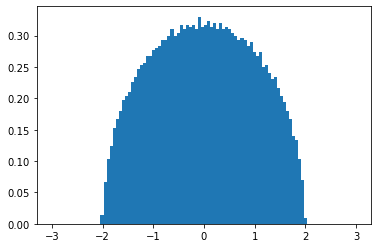

In [4]:
n = 5000
goe1 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=True)

observed, bins = goe1.eigval_hist(bins=100, interval=(-3,3), density=True, norm_const=1/np.sqrt(n/2))

width = bins[1] - bins[0]
centers = get_bins_centers(bins, contour=False)

plt.bar(bins[:-1], observed, width=width, align='edge')


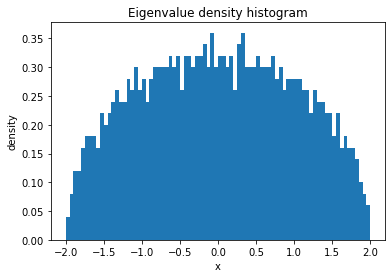

In [34]:
goe2 = GaussianEnsemble(beta=1, n=1000, use_tridiagonal=True)
goe2.plot_eigval_hist(bins=80, interval=(-2,2), density=True)

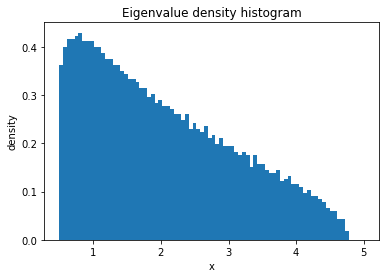

In [66]:
wr = WishartEnsemble(beta=2, n=10000, p=3000, use_tridiagonal=True)
wr.plot_eigval_hist(bins=80, interval=(0.5, 5), density=True)

In [5]:
from ensemble import wigner_semicircular_law
from ensemble import marchenko_pastur_law
from ensemble import tracy_widom_law

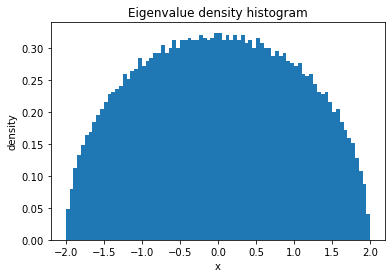

In [14]:
wigner_semicircular_law(ensemble='goe', n=5000, bins=80, density=True)

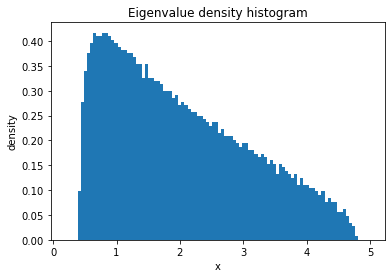

In [15]:
marchenko_pastur_law(ensemble='wce', p=3000, n=10000, bins=100, density=True)

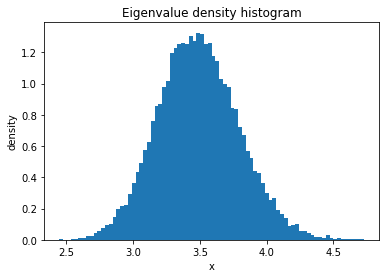

In [19]:
tracy_widom_law(ensemble='gse', n=10, t=30000, bins=80, density=True)